# [Week8] 이미지 분석 활용 맛보기(OCR) + 마스크 분류 프로젝트

## 1. 문자인식(OCR, Optical Character Recognition) 맛보기

### (1) 라이브러리 다운로드 : tesserocr

* 참고 링크 : https://pypi.org/project/tesserocr/

1. 아나콘다에서 작업할 가상환경으로 들어온다 (conda activate)
2. 다음 명령을 통해 라이브러리를 다운로드 한다.
```
conda install -c conda-forge tesserocr
```
3. 다음 코드를 통해 버전과 언어를 확인한다.

In [1]:
import tesserocr
from PIL import Image

print(tesserocr.tesseract_version())  # print tesseract-ocr version
print(tesserocr.get_languages())  # prints tessdata path and list of available languages

tesseract 4.1.1
 leptonica-1.78.0
  libgif 5.2.1 : libjpeg 9d : libpng 1.6.37 : libtiff 4.1.0 : zlib 1.2.11 : libwebp 1.0.2 : libopenjp2 2.3.1
('/opt/anaconda3/envs/my_python_env/share/tessdata/', ['Hangul', 'afr', 'amh', 'ara', 'asm', 'aze', 'aze_cyrl', 'bel', 'ben', 'bod', 'bos', 'bre', 'bul', 'cat', 'ceb', 'ces', 'chi_sim', 'chi_sim_vert', 'chi_tra', 'chi_tra_vert', 'chr', 'cos', 'cym', 'dan', 'deu', 'div', 'dzo', 'ell', 'eng', 'enm', 'epo', 'est', 'eus', 'fao', 'fas', 'fil', 'fin', 'fra', 'frk', 'frm', 'fry', 'gla', 'gle', 'glg', 'grc', 'guj', 'hat', 'heb', 'hin', 'hrv', 'hun', 'hye', 'iku', 'ind', 'isl', 'ita', 'ita_old', 'jav', 'jpn', 'jpn_vert', 'kan', 'kat', 'kat_old', 'kaz', 'khm', 'kir', 'kmr', 'kor', 'kor_vert', 'lao', 'lat', 'lav', 'lit', 'ltz', 'mal', 'mar', 'mkd', 'mlt', 'mon', 'mri', 'msa', 'mya', 'nep', 'nld', 'nor', 'oci', 'ori', 'osd', 'pan', 'pol', 'por', 'pus', 'que', 'ron', 'rus', 'san', 'script/Arabic', 'script/Armenian', 'script/Bengali', 'script/Canadian_Aborigi

4. 한글 인식을 위해 데이터를 다운로드 한다.
    * [한글 데이터 다운로드 링크](https://github.com/tesseract-ocr/tessdata/blob/master/script/Hangul.traineddata)
    * [(참고) 다른 언어 데이터 링크](https://github.com/tesseract-ocr/tessdata/tree/master/script)
5. 4번에서 다운받은 파일을 현재 가상환경 아래의 tessdata 폴더에 넣는다.

In [2]:
# 디렉터리 위치 확인
print(tesserocr.get_languages()[0])

/opt/anaconda3/envs/my_python_env/share/tessdata/


6. 다음 코드를 통해 'Hangul' 이 추가되었는지 확인한다.

In [3]:
# 지원되는 언어 다시 확인
print(tesserocr.get_languages()[1])

['Hangul', 'afr', 'amh', 'ara', 'asm', 'aze', 'aze_cyrl', 'bel', 'ben', 'bod', 'bos', 'bre', 'bul', 'cat', 'ceb', 'ces', 'chi_sim', 'chi_sim_vert', 'chi_tra', 'chi_tra_vert', 'chr', 'cos', 'cym', 'dan', 'deu', 'div', 'dzo', 'ell', 'eng', 'enm', 'epo', 'est', 'eus', 'fao', 'fas', 'fil', 'fin', 'fra', 'frk', 'frm', 'fry', 'gla', 'gle', 'glg', 'grc', 'guj', 'hat', 'heb', 'hin', 'hrv', 'hun', 'hye', 'iku', 'ind', 'isl', 'ita', 'ita_old', 'jav', 'jpn', 'jpn_vert', 'kan', 'kat', 'kat_old', 'kaz', 'khm', 'kir', 'kmr', 'kor', 'kor_vert', 'lao', 'lat', 'lav', 'lit', 'ltz', 'mal', 'mar', 'mkd', 'mlt', 'mon', 'mri', 'msa', 'mya', 'nep', 'nld', 'nor', 'oci', 'ori', 'osd', 'pan', 'pol', 'por', 'pus', 'que', 'ron', 'rus', 'san', 'script/Arabic', 'script/Armenian', 'script/Bengali', 'script/Canadian_Aboriginal', 'script/Cherokee', 'script/Cyrillic', 'script/Devanagari', 'script/Ethiopic', 'script/Fraktur', 'script/Georgian', 'script/Greek', 'script/Gujarati', 'script/Gurmukhi', 'script/HanS', 'script

### (2) 문자 인식 실습

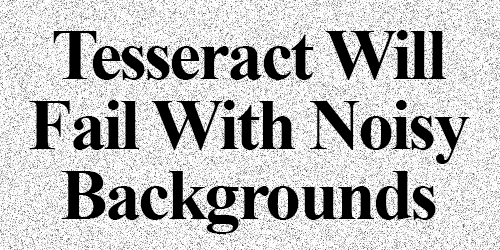

_ Tesseract Will
Fail With Noisy
_ Backgrounds —



In [4]:
# 영어 버전
path = './Image/english.png'
image = Image.open(path)
display(image)
print(tesserocr.image_to_text(image, lang='eng'))  # print ocr text from image

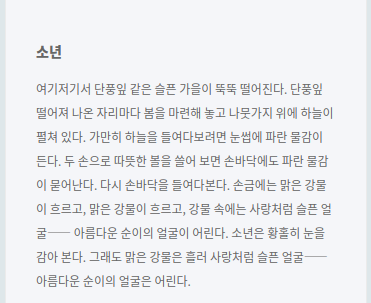

소년

여기저기서 단 품 잎 같은 슬픈 가 을 이 뚝뚝 떨어진다. 단 품 잎
떨어져 나온 자 리 마다 봄 을 마련해 놓고 나 못 가지 위에 하 늘 이
펼쳐 있다. 가만히 하 늘 을 들 여 다 보려면 눈 썸 에 파란 물 감 이
든다. 두 손 으로 따뜻한 볼 을 쓸어 보면 손 바 닥 에도 파란 쿨 감
이 묻 어 난다. 다시 손 바 닥 을 들 여 다 본다. 손 금 에는 맑은 강 룰
이 흐르고, 맑은 강 룰 이 흐르고, 강 룰 속에는 사 랑 처럼 슬픈 얼
굴 - ㅡ 아름다운 순 이 의 얼 굴 이 어 린 다. 소 년 은 황 홀 히 눈 을
감아 본다. 그래도 맑은 강 룰 은 흘러 사 랑 처럼 슬픈 얼 굴 ㅡ ㅜㅜ
아름다운 순 이 의 얼 굴 은 어 린 다.

 

 

 



In [5]:
# 한글 버전
path = './Image/korean.png'
image = Image.open(path)
display(image)
print(tesserocr.image_to_text(image, lang='Hangul'))  # print ocr text from image

### (3) 문자 인식을 활용한 프로젝트 아이디어

> __이미지에서 문자를 추출하는 문자인식 기술을 사용한 프로젝트들을 검색하거나 생각해보고 1개 이상 작성해주세요.__

답변 : 스노보드에 올라온 공지사항 텍스트 파일로 저장하기

## 2. 마스크 착용 여부 분류 (mask classification)

### (1) 캐글에서 모델 만들기

* 캐글 데이터셋 : https://www.kaggle.com/andrewmvd/face-mask-detection
* 복사할 노트북 : https://www.kaggle.com/tapan2930/fastai-mask-classification/

1. 노트북을 [Copy and Edit]한다.
2. 노트북을 하나씩 실행해보며 결과를 확인한다.
3. 마지막 코드에서 model export 을 주석 풀고 실행한다.
4. output 결과로 나오는 /kaggle/working/model.pkl 을 다운로드하여, Model 폴더에 넣는다.

### (2) 라이브러리 설치

* 참고 링크 : https://pypi.org/project/fastai/1.0.60/
* __주의사항 : fastai 버전은 1로 맞춰서 설치해주세요!__

In [ ]:
!pip install fastai==1.0.60

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import fastai
fastai.__version__

'1.0.60'

In [4]:
import cvlib as cv
import cv2
import torch
import time
import imutils
from PIL import Image as PImage
from matplotlib import pyplot as plt
from fastai.vision import *
from torchvision.transforms import Compose, Resize, ToPILImage, ToTensor

### (3) 마스크 착용 여부 분류 프로그램 작성하기

* 참고 링크 : https://github.com/vinaykudari/mask-classification/blob/master/inference/mask-detection-on-webcam.ipynb

In [5]:
# 모델 가져오기
learn = load_learner("./Model", 'model.pkl')

In [6]:
# Transform image
transformations = Compose([
        ToPILImage(),
        Resize((224, 224)),
        ToTensor(),
    ])

In [7]:
webcam = cv2.VideoCapture(0)

if not webcam.isOpened():
    print("Could not open webcam")
    exit()

while webcam.isOpened():
    status, frame = webcam.read()

    if not status:
        print("Could not read frame")
        exit()

    im = cv2.flip(frame, 1)
    
    # 1. cvlib 의 얼굴 인식 함수를 사용하여 다음 코드를 완성하세요.
    # --------- Start Edit -------------
    faces, confidences = cv.detect_face(im)
    # --------- End Edit   -------------
    
    for face in faces:
        (startX,startY) = face[0],face[1]
        (endX,endY) = face[2],face[3]
        
        # 2. 사진에서 얼굴 부분만 크롭하세요.
        # --------- Start Edit -------------
        face_crop = im[startY:endY, startX:endX]
        # --------- End Edit   -------------
        
        # 3. face_crop 이미지를 BGR 에서 RGB 로 변환해주세요.
        # --------- Start Edit -------------
        face_RGB = cv2.cvtColor(face_crop, cv2.COLOR_BGR2RGB)
        # --------- End Edit   -------------
        
        outImg = Image(transformations(face_RGB))
        
        # 4. learn.predict() 을 이용하여, outImg 의 결과를 받아오세요.
        # --------- Start Edit -------------
        pred_class, pred_idx, class_scores = learn.predict(outImg)
        # --------- End Edit   -------------
        
        text = f'{pred_class}, {int(class_scores[pred_idx]*100)} accurate'
        cv2.putText(im, text, (startX,startY), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
    
    cv2.imshow("Real-time video", im)

    # 키보드의 'q'를 누르면 프로그램이 종료됩니다.
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

webcam.release()
cv2.destroyAllWindows()